In [97]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [98]:
data = pd.read_csv('banking.csv', header=0)

In [99]:
data = data.dropna()

In [100]:
print(data.shape)

(41188, 21)


In [101]:
print(list(data.columns))

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [102]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [103]:
data.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'], dtype=object)

In [104]:
data.education = data.education.replace('basic.9y', 'Basic')
data.education = data.education.replace('basic.6y', 'Basic')
data.education = data.education.replace('basic.4y', 'Basic')

In [105]:
data.education.unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [106]:
data.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

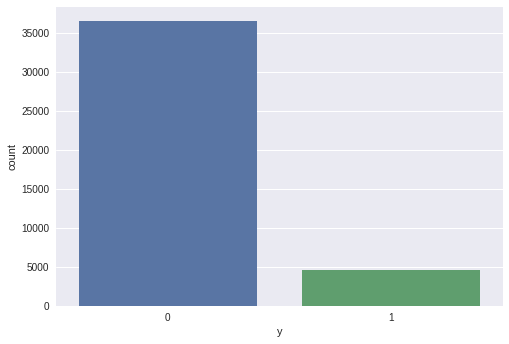

In [107]:
sns.countplot(x = 'y', data = data, order = data.y.value_counts().index)
plt.show()

In [108]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [109]:
data.groupby(['y', 'job']).mean()

age    duration  campaign       pdays  previous  \
y job                                                                    
0 admin.         38.219846  215.093385  2.707718  981.270783  0.141125   
  blue-collar    39.582057  229.878018  2.588208  991.516365  0.111653   
  entrepreneur   41.703453  225.632883  2.579580  987.813814  0.128378   
  housemaid      44.705451  218.778826  2.722222  986.491614  0.089099   
  management     42.309707  220.828197  2.532357  984.848613  0.140986   
  retired        59.926128  224.263608  2.657076  960.369362  0.212286   
  self-employed  40.176887  222.220912  2.724843  988.073113  0.123428   
  services       38.090236  225.047998  2.619309  991.091607  0.136314   
  student        26.396667  228.851667  2.238333  924.596667  0.395000   
  technician     38.600033  213.452021  2.641776  985.135540  0.111093   
  unemployed     39.844828  212.706897  2.668966  973.879310  0.131034   
  unknown        45.375427  204.559727  2.679181  954.873720  0.095563   
1 admin.         37.968935  517.414201  2.058432  773.512574  0.510355   
  blue-collar    39.200627  732.673981  2.156740  899.324451  0.269592   
  entrepreneur   41.935484  667.540323  2.064516  910.943548  0.250000   
  housemaid      52.650943  535.537736  1.896226  727.367925  0.575472   
  management     42.783537  543.804878  2.030488  786.929878  0.533537   
  retired        68.253456  420.235023  1.942396  712.937788  0.668203   
  self-employed  38.006711  622.020134  2.114094  878.859060  0.315436   
  services       36.077399  634.851393  2.232198  854.479876  0.365325   
  student        24.800000  403.316364  1.810909  656.116364  0.807273   
  technician     37.746575  553.190411  2.046575  793.676712  0.505479   
  unemployed     39.062500  471.451389  1.930556  702.333333  0.611111   
  unknown        47.054054  517.756757  2.405405  810.864865  0.621622   

                 emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
y job                                                                     
0 admin.             0.224068       93.566030     -40.349768   3.786567   
  blue-collar        0.303552       93.668887     -41.346565   3.835402   
  entrepreneur       0.242868       93.626245     -41.319820   3.881632   
  housemaid          0.641300       93.712759     -39.626834   4.243082   
  management         0.141217       93.550062     -40.619992   3.785477   
  retired           -0.283904       93.493273     -38.920762   3.249794   
  self-employed      0.242610       93.591786     -40.501022   3.854206   
  services           0.256720       93.650433     -41.327537   3.793805   
  student           -1.133167       93.350790     -40.751500   2.208683   
  technician         0.441693       93.584196     -39.918310   4.012318   
  unemployed         0.147241       93.604369     -40.193908   3.775461   
  unknown            0.555290       93.748703     -38.882594   4.154038   
1 admin.            -1.383210       93.319537     -39.545488   1.965078   
  blue-collar       -0.487774       93.491480     -41.770846   2.915715   
  entrepreneur      -0.745161       93.381153     -40.895161   2.818839   
  housemaid         -1.437736       93.350934     -38.311321   1.908717   
  management        -1.230793       93.306631     -39.456402   2.232896   
  retired           -1.926267       93.245629     -37.542857   1.348569   
  self-employed     -1.173154       93.288470     -40.377852   2.282242   
  services          -0.743034       93.456598     -40.866873   2.631139   
  student           -2.007636       93.289771     -38.957091   1.176313   
  technician        -1.102055       93.374286     -40.003836   2.239584   
  unemployed        -1.676389       93.318563     -38.881944   1.600444   
  unknown           -1.205405       93.483270     -38.127027   2.325622   

                 nr_employed  
y job                         
0 admin.         5175.512051  
  blue-collar    5178.296031  
  entrepreneur   5180.2

In [110]:
data.groupby(['y', 'marital']).mean()

age    duration  campaign       pdays  previous  \
y marital                                                           
0 divorced  44.318907  219.339217  2.667311  988.922872  0.131044   
  married   41.964145  221.204233  2.628550  986.273933  0.118637   
  single    33.453458  220.417270  2.623341  977.348412  0.163249   
  unknown   40.397059  256.588235  3.470588  969.941176  0.220588   
1 divorced  49.943277  553.138655  2.144958  792.399160  0.495798   
  married   45.341232  577.938389  2.079779  798.956951  0.482622   
  single    31.348765  513.952469  1.983951  781.414815  0.506790   
  unknown   39.583333  630.833333  1.583333  751.000000  0.583333   

            emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
y marital                                                            
0 divorced      0.307930       93.628370     -40.772655   3.887242   
  married       0.332783       93.623935     -40.354773   3.914493   
  single        0.037817       93.548650     -41.048452   3.550635   
  unknown      -0.101471       93.522868     -41.548529   3.441971   
1 divorced     -1.086765       93.417082     -40.137185   2.224223   
  married      -1.135703       93.362369     -39.526659   2.253996   
  single       -1.431790       93.324788     -40.121914   1.885499   
  unknown      -0.900000       93.178750     -36.691667   2.582417   

            nr_employed  
y marital                
0 divorced  5179.247921  
  married   5179.883783  
  single    5166.602815  
  unknown   5163.610294  
1 divorced  5098.157353  
  married   5100.777646  
  single    5085.173025  
  unknown   5122.166667

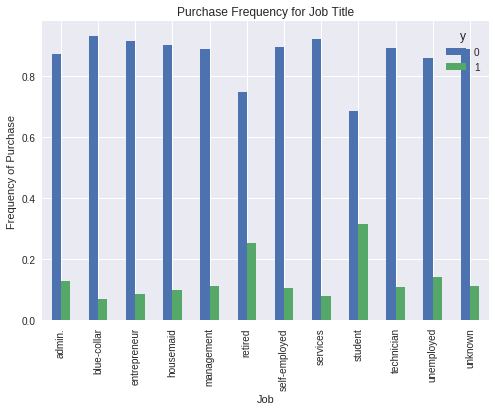

In [111]:
pd.crosstab(data.job, data.y).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.show()

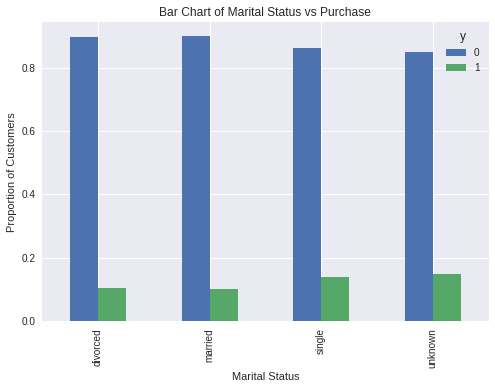

In [112]:
pd.crosstab(data.marital, data.y).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
plt.title('Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.show()

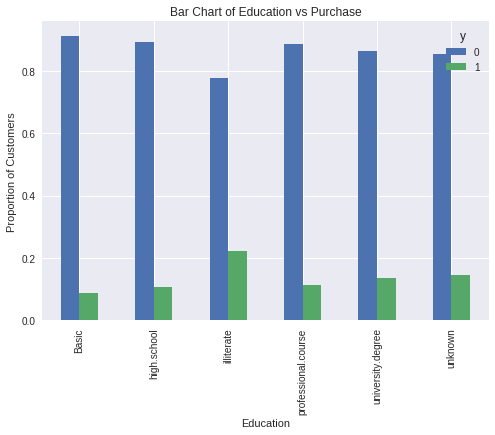

In [113]:
pd.crosstab(data.education, data.y).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
plt.title('Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.show()

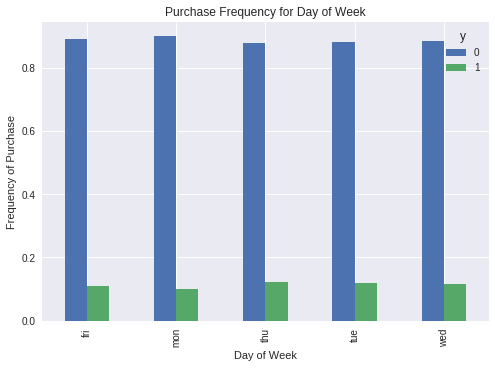

In [114]:
pd.crosstab(data.day_of_week,data.y).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.show()

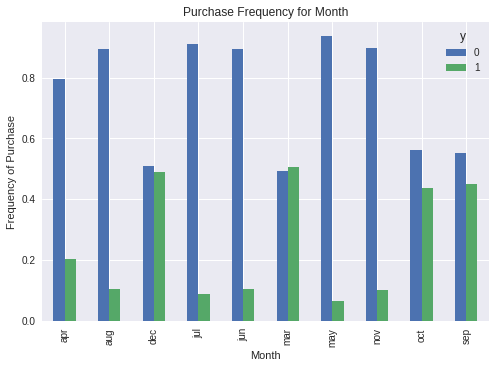

In [115]:
pd.crosstab(data.month,data.y).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.show()

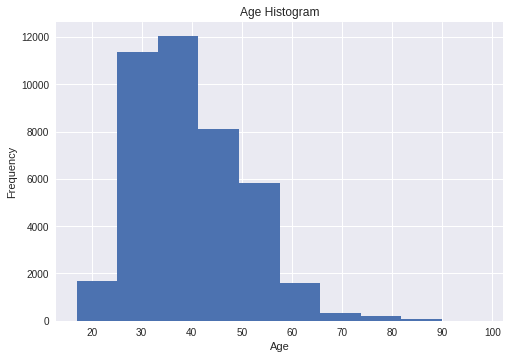

In [116]:
data.age.hist()
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

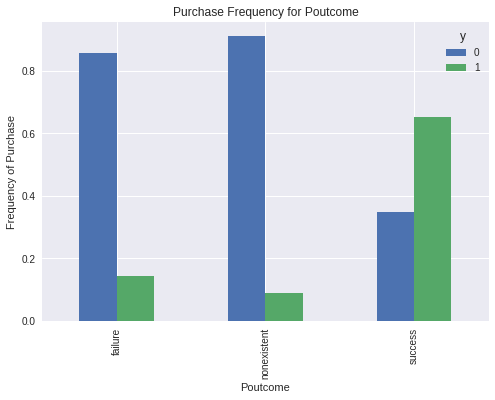

In [117]:
pd.crosstab(data.poutcome,data.y).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.show()

In [118]:
data_final = pd.get_dummies(data, prefix=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'], columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])

In [119]:
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [120]:
final_data_cols=data_final.columns.values.tolist()
y=['y']
X=[i for i in final_data_cols if i!='y']

In [121]:
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 18)
rfe = rfe.fit(data_final[X], data_final[y].values.ravel())
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False False False  True False False  True
 False False False  True False  True  True False False False False False
 False False False False False False False False  True False False False
 False False False False False False  True  True  True  True False False
  True  True  True False False False  True False False False  True  True
  True]
[35 33 15 40  1 18 20 22  1 31 14  1  8 39 42  1 28  1  1 24 26 41  3  4  5
 43  9 10 38 11 29 23  1  6 44 36 16 37 21 19 17  7  1  1  1  1 25 27  1  1
  1 32 13 12  1 34 30  2  1  1  1]


In [122]:
final_cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
Features=data_final[final_cols]
labels=data_final.y

In [123]:
logit_model=sm.Logit(labels,Features)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.287116
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41170
Method:                           MLE   Df Model:                           17
Date:                Fri, 02 Mar 2018   Pseudo R-squ.:                  0.1844
Time:                        23:23:41   Log-Likelihood:                -11826.
converged:                       True   LL-Null:                       -14499.
                                        LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                 0.2385      0.051      4.642      0.000       0.138       0.339

In [125]:
X_train, X_test, y_train, y_test = train_test_split(Features, labels, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [126]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [127]:
results = model_selection.cross_val_score(LogisticRegression(), X_train, y_train, cv=model_selection.KFold(n_splits=10, random_state=10), scoring='accuracy')
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.897


In [133]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("The Confusion Matrix is:")
print(conf_matrix)

The Confusion Matrix is:
[[10872   109]
 [ 1122   254]]


In [129]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95     10981
          1       0.70      0.18      0.29      1376

avg / total       0.88      0.90      0.87     12357



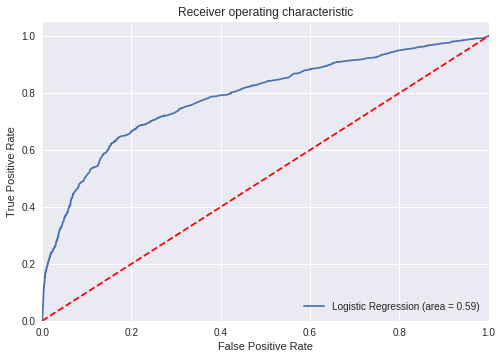

In [131]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()